In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'default-of-credit-card-clients-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F306%2F666%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240710%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240710T115223Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D60818bf2d10915153173140b1d417d9bebf90e511905f5f997e7ea7c5bc87a05a0fe56a9c0601a8ae3129b0726f4c25f9fb88214f225c384345bdbe08ca64b4670166ebd260b629c70c8c7559f592efa3f5332b10a0ba07c1448d843356715b8b6df0f9a3be53a8b76092edb705863e135763c2453b82078b63b3f457afb77510187e678e572982391c4cf220cf5bad19e815d390cf120fb69f152933c70bb3a73b1ddb6b50e14839694976c6c33e0f61cd2b5762155f13f9a9cb8503245ce63316daf0a1122fb844fa8d9637eb039b89dad74b4221524937e298f72a5c403e2ca42554da3e072f1af15b4d1e1751af0d37e4911a7290b02715f3f1f0d329005,german-credit:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F531%2F1056%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240710%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240710T115223Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D05f676cd8e55443d4af9924a0c831daf462a5d01c463a988ed8cb038439a441be4c5f5167c3f211ac98d62daad891ea6db8bc8581c3842a699b7ef7cda16f060db456bdc88941dfc114ffce577f850adeaeada3483007e32edde87d8becdbe0de68869929bb8d08af93649c30cfc2aa79c92deaaed4690ebf1c6878c3bb095dcf2463490e9fb8cdbce01db1a96477628d38cb201543b8c460b4730f0a5aa3156ac5b326a7e65af33275def20f1ac005c25236be47a7b0a57cc80c71a241691d3b2b4d24f63dce7a7c8a5045e82afb279dd510246a26d0accd8180a862dbef85b782253a23ba7496150350316769670e3eabeae87e15bf910730e4171751ebd34,creditcardfraud:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F310%2F23498%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240710%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240710T115223Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D69cb30e253329b2aa2cd63ffc8f64588fd2091a20e6ca85dcdc34281c30b6724243aad9a8417661656070b8631f645c4d65d692d34ea74079e70032d587361ba0bb6a5a5657f46a3c62b989832354279d80e51964ad749daaf2920ec5dceba0b82e17a77584aeefed7118aba975cc77f81baa07bddb679b3e4ec881e13a094c4926eb1c927999a7fb1180c902d93bb203f17519cd77c3bb527270bee6a4ba84398dbc0edadb37f377b85a98f294d42302f8b7641b40cd5af5ac1ed3bdc1fb1cf1fd19e46cd564eeb141b634049b75de32d951a87bb82404a3c2862209388ea08192b3c3f38a0b39072319379e9cc181ed3f274fdc23ed0b6ddb3a84ba228d0bf,credit-card:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F263888%2F552038%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240710%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240710T115223Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5cc973e9ab99df1bbe80ea40e4f2de1c551e2b0434dfb4ac4fc47c3aa5eec0c724c7ea333a39347f95b2e7bdd96272eca8c1af61d3acbae624eec7f863de96d21e8718e629c6cd677325b588a02eba7c15eea27b325a2377d1dd7a6f6d18f3c699bc2eb5b32b98e89b6f525add99c9badeb0b1f54b142d2a941b70f8794bf888d7d8ca390efcab268d183c109e8706cb175722dd3cc5b1310935276776449da109e09a165af1f5f9c51df8dbac04765c14d0fb29b6ba3cde790d241cd77b84cd042420caa5471345a7dc7610756424e1310ba72807ab21101b11e6355abc0325ae6f298e2cb803e39d6dd6c8d08a5449f4718166294dd1ea298a24f896e6f098,fraud-detection:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F817870%2F1399887%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240710%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240710T115223Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D12420c31d0b3a6c40b2478c7342056e825bbfcce551eb039f3732fb39fd1030381d80c139cceea33e032ab13e6742eeff355446b9ce3e73054735cb2acf22a3fcb0074375c0ae57095bfbc3ed1c3291a5d9f9c41e5ce99edfb71769c0e7bca901d9074e48bb270fe5cb65a569aa451bfbe3490fc0541b0140c28fe36b144e50b93613c6d0c31d5396bda8a71258efab2315d6116e5121ed6f11a229ff2f795e27a5359dca996f93c2e37466a377f54e99e4c58dad6262b13bcf1853d109d690546eab1a973e7a1f16938b2ad07b79c2bd609259fe00a08c78ba5aa33f3fe238095c430ca999d4210e56ca679e124f6802b52f500f7572badc517c17bd4baa4ef,credit-card-customers:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F982921%2F1660340%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240710%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240710T115223Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D69cc48a17bcdefc3c163c8f3fc45db76d9d7d6e9184aaaec0350947561a1a18d8f7fcfc7e14387c68a1b19d51073c9844410410e133c1c445ded4b8002bf8ef90ddf1d27eaf8842dea67f900f113f16a3665ed03cc093bf4e3c873e6286e9d97090c08af4aeaaccd05d2a78da1587aa3c49df8579c2ca037fb924e209894d9b069053d171adc8f6de7d880d5b19c5e7a02069fd9e7e914f163032877b94ddd502e9ab32042cd37afd7dae20b5f9b079435f89edc735f7558c556db27f0ac88be87321b3dfff4f9ee290228e813aeaad81ea27e61fa49d8b0774b0647a504066bfee2bd1c54a809a33710c697ddbf2d5fe4d76cbe8543cc067163481944b3df36,credit-card-customers-prediction:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2590623%2F4422779%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240710%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240710T115223Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D0d510ee0571f57d8c77f3c21b0077c27872c4b0ee8376076af7b84c41de245fa1b71bd355761111e59e28fb994defa158469a7646a93cc15bfdef5871dbd6242b3c37c02d4d6b8549e996dfc5e5d95470dc3b34b46d14fa31be07950e2d6ebd8187da3d7885a7d38a6c20eca137c4845d30db3c0b41e4b66648fef2f90833d921e0b34169385028e56f1cd8b621102073bd4137b0d03618151e39cd1a7ff4fc6cecffbb9345ed5770ef89aa0bfe79a0fbfa280aff831cc78b3f67de959c4798765c31b4eac783c8c76d200f72070e4e9e26b5e321a5aee0dbecdb7b9d0188d58e412e62d7aec93af9edcc3b7a0bea1b381d9898184ec64706009d09b78fb570e,credit-card-spendings:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4541632%2F8050363%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240710%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240710T115224Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D18b2b9c863b70fbf2a4dde43d6c3a6def4ce2dafe0734283597ee296f5e6eecefe5551af23c43da6babc0f2493fa0f2d3262d243c1b5ddff600aefa85b2a66b3a51d2eca8684d68bedcb8045a7e0dc7429d3b82be66440c19d12e4606bde2d02293721fad80b8d760b765c98c40cbf246a757d2d218b441d688da2a74ddde661b562f8ae49abc2c86418546e9e70a9bca7b6193dc7d2ab14ce65ba703b575cfc9852dbe7e39530535f6dbb49e1ed4922b9698c31890300756203bbb26d8e13308347613cfc53a32283a429092bfceecbf759c8074976aecbdacf8056d498d36c68a111613dfcff696a597e688341b045b2190a779f74cb2966e409ca8677697d'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')

[==================================================] 1025318 bytes downloaded
Downloaded and uncompressed: default-of-credit-card-clients-dataset
[==================================================] 11160 bytes downloaded
Downloaded and uncompressed: german-credit
[==================================================] 69155672 bytes downloaded
Downloaded and uncompressed: creditcardfraud
[==================================================] 117814223 bytes downloaded
Downloaded and uncompressed: credit-card
[================================================= ] 211558400 bytes downloaded

In [177]:
import pandas as pd
data =pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


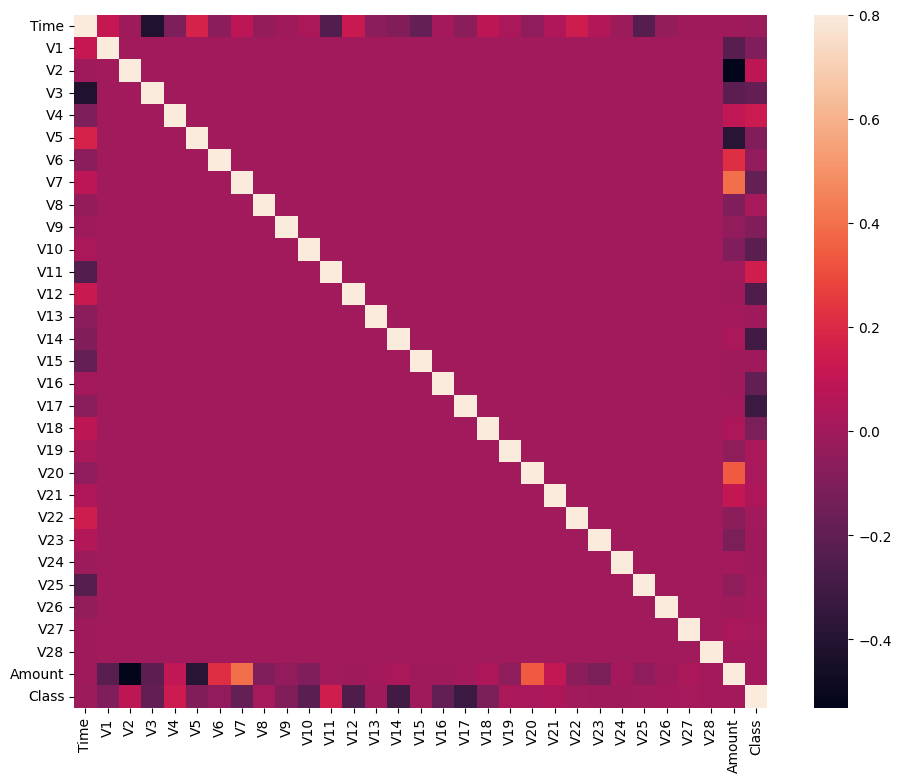

In [153]:
#plotting the correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

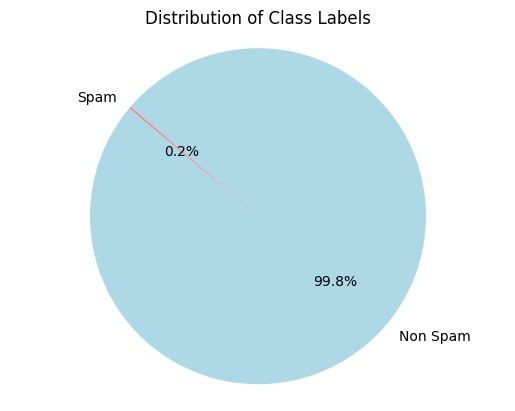

In [154]:
import matplotlib.pyplot as plt
import pandas as pd
class_counts = data['Class'].value_counts()

# Create a pie chart
labels = ['Non Spam', 'Spam']
colors = ['lightblue', 'lightcoral']
plt.pie(class_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Class Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [155]:
data.shape

(284807, 31)

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [157]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [158]:
print("Number of columns: {}".format(data.shape[1]))
print("Number of rows: {}".format(data.shape[0]))

Number of columns: 31
Number of rows: 284807


In [159]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Using MinMaxScaler to scale the 'Amount' column
scaler = MinMaxScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])



In [160]:
print(data.head)

<bound method NDFrame.head of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.

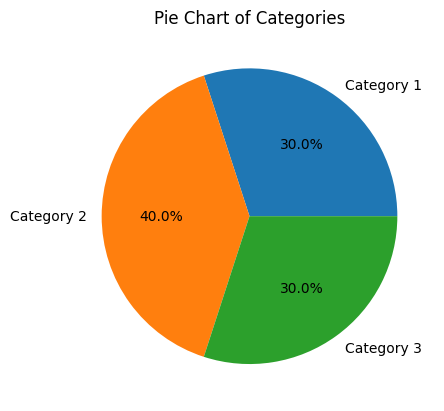

In [161]:
# prompt: plot pie chart

import matplotlib.pyplot as plt

# Define data
labels = ["Category 1", "Category 2", "Category 3"]
values = [30, 40, 30]

# Create a pie chart
plt.pie(values, labels=labels, autopct="%1.1f%%")

# Add title and show the plot
plt.title("Pie Chart of Categories")
plt.show()


In [163]:
data = data.drop(['Time'], axis =1)

In [164]:
data.shape

(284807, 30)

In [165]:
print(data.head)

<bound method NDFrame.head of                V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V21       V22  \
0       0.239599  0.098698  0.

In [166]:
X = data.drop('Class', axis = 1)
y=data['Class']

In [167]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [168]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "K-Nearest Neighbors Classifier": KNeighborsClassifier(),
}

# Iterate over classifiers
for name, clf in classifiers.items():
    print(f"\n========== {name} ==========")

    # Fit the classifier
    clf.fit(X_train, y_train)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Print confusion matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



========== Logistic Regression ==========
Accuracy: 0.9991
Precision: 0.8615
Recall: 0.5714
F1 Score: 0.6871

Confusion Matrix:
[[56855     9]
 [   42    56]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.57      0.69        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962


========== Decision Tree Classifier ==========
Accuracy: 0.9991
Precision: 0.7290
Recall: 0.7959
F1 Score: 0.7610

Confusion Matrix:
[[56835    29]
 [   20    78]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.80      0.76        98

    accuracy                           1.00     56962
   macro avg       0.86      0.90      0.88     56962
weighted avg       1.00     

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
#random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
#predictions
yPred = rfc.predict(X_test)

In [170]:
#building all kinds of evaluating parameters
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

#n_outliers = len(is_fraud)
n_errors = (yPred != y_test).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(y_test, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(y_test, yPred)
print("The precision is {}".format(prec))

rec = recall_score(y_test, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(y_test, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(y_test, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is Random Forest classifier
The accuracy is 0.9995786664794073
The precision is 0.9743589743589743
The recall is 0.7755102040816326
The F1-Score is 0.8636363636363635
The Matthews correlation coefficient is0.8690748763736589


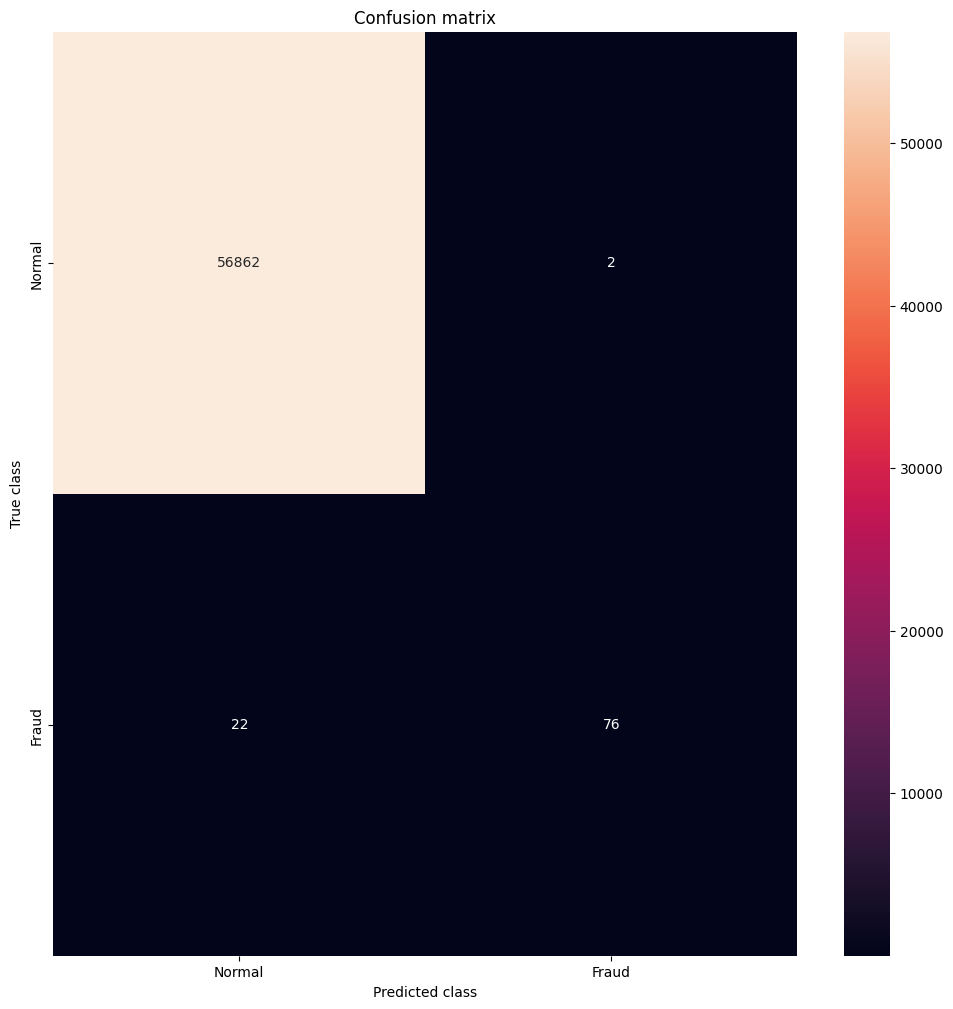

In [174]:
#visulalizing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [171]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined as your feature and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes model creation
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predictions
y_pred = gnb.predict(X_test)


In [172]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.naive_bayes import GaussianNB

# Assuming you have trained and predicted using Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("The model used is Naive Bayes classifier")

acc = accuracy_score(y_test, y_pred)
print("The accuracy is {:.2f}".format(acc))

prec = precision_score(y_test, y_pred)
print("The precision is {:.2f}".format(prec))

rec = recall_score(y_test, y_pred)
print("The recall is {:.2f}".format(rec))

f1 = f1_score(y_test, y_pred)
print("The F1-Score is {:.2f}".format(f1))

MCC = matthews_corrcoef(y_test, y_pred)
print("The Matthews correlation coefficient is {:.2f}".format(MCC))

The model used is Naive Bayes classifier
The accuracy is 0.98
The precision is 0.06
The recall is 0.82
The F1-Score is 0.11
The Matthews correlation coefficient is 0.22


In [175]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef

# Assuming you have trained and predicted using Gradient Boosting Classifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("The model used is Gradient Boosting classifier")

acc = accuracy_score(y_test, y_pred)
print("The accuracy is {:.2f}".format(acc))

prec = precision_score(y_test, y_pred)
print("The precision is {:.2f}".format(prec))

rec = recall_score(y_test, y_pred)
print("The recall is {:.2f}".format(rec))

f1 = f1_score(y_test, y_pred)
print("The F1-Score is {:.2f}".format(f1))

MCC = matthews_corrcoef(y_test, y_pred)
print("The Matthews correlation coefficient is {:.2f}".format(MCC))

The model used is Gradient Boosting classifier
The accuracy is 1.00
The precision is 0.74
The recall is 0.60
The F1-Score is 0.66
The Matthews correlation coefficient is 0.67


In [176]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef

# Assuming you have trained and predicted using Support Vector Machine (SVM) Classifier
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("The model used is Support Vector Machine (SVM) classifier")

acc = accuracy_score(y_test, y_pred)
print("The accuracy is {:.2f}".format(acc))

prec = precision_score(y_test, y_pred)
print("The precision is {:.2f}".format(prec))

rec = recall_score(y_test, y_pred)
print("The recall is {:.2f}".format(rec))

f1 = f1_score(y_test, y_pred)
print("The F1-Score is {:.2f}".format(f1))

MCC = matthews_corrcoef(y_test, y_pred)
print("The Matthews correlation coefficient is {:.2f}".format(MCC))


The model used is Support Vector Machine (SVM) classifier
The accuracy is 1.00
The precision is 0.97
The recall is 0.62
The F1-Score is 0.76
The Matthews correlation coefficient is 0.78


In [173]:
# prompt: take some random values and predict

import random

# Generate random indices within the test set size
random_indices = random.sample(range(len(X_test)), 5)

# Select random samples from X_test and y_test
random_X = X_test.iloc[random_indices]
random_y = y_test.iloc[random_indices]

# Predict the class labels for the random samples
predicted_labels = rfc.predict(random_X)

# Print the actual and predicted labels
for i, index in enumerate(random_indices):
    print(f"Sample {index + 1}:")
    print(f"Actual Label: {random_y.iloc[i]}")
    print(f"Predicted Label: {predicted_labels[i]}")


Sample 2696:
Actual Label: 0
Predicted Label: 0
Sample 49412:
Actual Label: 0
Predicted Label: 0
Sample 18316:
Actual Label: 0
Predicted Label: 0
Sample 28378:
Actual Label: 0
Predicted Label: 0
Sample 45768:
Actual Label: 0
Predicted Label: 0
